<a href="https://colab.research.google.com/github/dpanagop/data_analytics_examples/blob/master/Neural_net_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural net example

This, notebook contains an examples of using neural networks. In especial,
* a regression example using Boston Housing dataset for predicting house prices 
* a classification example using Credit Fraud dataset for predicting fraudulous transactions.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, classification_report
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline 

## Regression with Boston Housing dataset

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.boston_housing.load_data(
    path="boston_housing.npz", test_split=0.2, seed=113
)

In [ ]:
x_train.shape

(404, 13)

In [ ]:
scaler_x = MinMaxScaler()
scaler_x.fit(x_train)
x_train_norm = scaler_x.transform(x_train)
x_test_norm = scaler_x.transform(x_test)

In [ ]:
scaler_y = MinMaxScaler()
scaler_y.fit(y_train.reshape(-1, 1))
y_train_norm = scaler_y.transform(y_train.reshape(-1, 1))
y_test_norm = scaler_y.transform(y_test.reshape(-1, 1))

In [ ]:
model=keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(13,)))
model.add(keras.layers.Dense(5, activation='relu'))
model.add(keras.layers.Dense(3, activation='relu'))
model.add(keras.layers.Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=["mae"])

In [ ]:
model.fit(x_train_norm,y_train_norm,epochs=300)

Epoch 1/300
13/13 [==============================] - 0s 2ms/step - loss: 0.6692 - mae: 0.7922
Epoch 2/300
13/13 [==============================] - 0s 2ms/step - loss: 0.4748 - mae: 0.6590
Epoch 3/300
13/13 [==============================] - 0s 2ms/step - loss: 0.2926 - mae: 0.4946
Epoch 4/300
13/13 [==============================] - 0s 2ms/step - loss: 0.1519 - mae: 0.3200
Epoch 5/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0801 - mae: 0.2172
Epoch 6/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0608 - mae: 0.1946
Epoch 7/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0565 - mae: 0.1876
Epoch 8/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0527 - mae: 0.1809
Epoch 9/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0493 - mae: 0.1739
Epoch 10/300
13/13 [==============================] - 0s 2ms/step - loss: 0.0464 - mae: 0.1684
Epoch 11/300
13/13 [==============================] - 0s 2m

In [ ]:
y_pred_norm = model.predict(x_test_norm)

In [ ]:
y_pred = scaler_y.inverse_transform(y_pred_norm)

In [ ]:
y_pred[:5,]

array([[10.3600235],
       [18.306957 ],
       [22.275805 ],
       [38.366795 ],
       [23.219725 ]], dtype=float32)

In [ ]:
y_test[:5,]

array([ 7.2, 18.8, 19. , 27. , 22.2])

In [ ]:
print(f'Mean square error {mean_squared_error(y_test, y_pred, squared=False)}')

Mean square error 5.516900419938801


In [ ]:
print(f'Mean absolute error {mean_absolute_error(y_test, y_pred)}')

Mean absolute error 3.5773153566846663


In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 5)                 70        
                                                                 
 dense_39 (Dense)            (None, 3)                 18        
                                                                 
 dense_40 (Dense)            (None, 1)                 4         
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


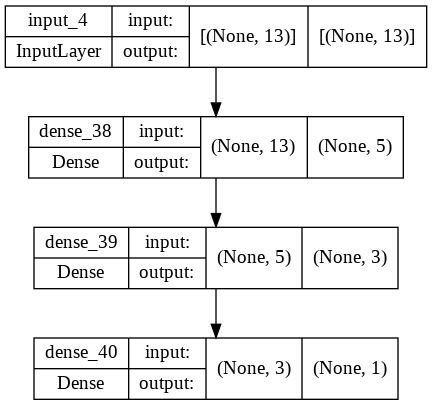

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

## Classification with Credit Fraud dataset 

In [ ]:
!wget -O creditfraud.zip https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0

--2022-06-14 20:27:36--  https://www.dropbox.com/s/tl20yp9bcl56oxt/creditcardfraud.zip?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601b:18::a27d:812
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/tl20yp9bcl56oxt/creditcardfraud.zip [following]
--2022-06-14 20:27:37--  https://www.dropbox.com/s/raw/tl20yp9bcl56oxt/creditcardfraud.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9f4ac76829f0dc56e297b11725.dl.dropboxusercontent.com/cd/0/inline/BnO-UqxUcbIdRzu4_OUvrx0HLYhWftzrdglv29kiSV8eDl18zl546Wsmcv3cD8x8Q67pnhFvdRCFVGabdlTxlycSOv32sbe6Du-oAjKOq2tABU4-9iruDSU-qH8dkUc3ICC1cPtyzVsooSlqioaAeneCPIpYVyIIhZX8RVqhqi02Cw/file# [following]
--2022-06-14 20:27:37--  https://uc9f4ac76829f0dc56e297b11725.dl.dropboxusercontent.com/cd/0/inline/BnO-UqxUcbIdRzu4_OUvrx0HLYhWftzrdglv29kiSV

In [ ]:
!unzip creditfraud.zip

Archive:  creditfraud.zip
replace creditcard.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
dat=pd.read_csv('creditcard.csv')
dat.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
dat['Class'].value_counts()/dat['Class'].count()

0    0.998273
1    0.001727
Name: Class, dtype: float64

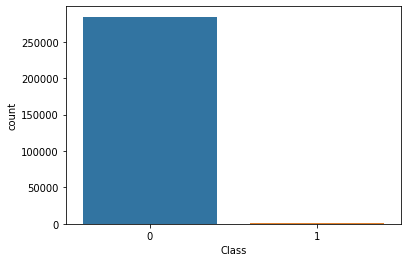

In [ ]:
sns.countplot(x='Class',data=dat)

In [ ]:
dat = dat.drop([ 'Time'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [ ]:
scaler = MinMaxScaler()
scaler.fit(dat.drop('Class',1))
x_norm = scaler.transform(dat.drop('Class',1))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
X_cl_train, X_cl_test, y_cl_train, y_cl_test = train_test_split(x_norm , dat['Class'], test_size=0.5, random_state=0)

In [ ]:
cl_model = tf.keras.models.Sequential([
  tf.keras.layers.InputLayer(input_shape=(29,)),
  tf.keras.layers.Dense(20, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(5, activation=tf.nn.relu),
  tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)
])

In [ ]:
cl_model.compile(optimizer='adam',
              loss='BinaryCrossentropy',
              metrics=['accuracy'])

cl_model.fit(X_cl_train, y_cl_train, epochs=10)

Epoch 1/10
4451/4451 [==============================] - 11s 2ms/step - loss: 0.0319 - accuracy: 0.9948
Epoch 2/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0050 - accuracy: 0.9990
Epoch 3/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0037 - accuracy: 0.9993
Epoch 4/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0035 - accuracy: 0.9994
Epoch 5/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 6/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 7/10
4451/4451 [==============================] - 10s 2ms/step - loss: 0.0034 - accuracy: 0.9993
Epoch 8/10
4451/4451 [==============================] - 10s 2ms/step - loss: 0.0035 - accuracy: 0.9993
Epoch 9/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.0033 - accuracy: 0.9994
Epoch 10/10
4451/4451 [==============================] - 9s 2ms/step - loss: 0.

In [ ]:
y_cl_pred_prob = cl_model.predict(X_cl_test)

In [ ]:
y_cl_pred_prob.shape

(142404, 1)

In [ ]:
y_cl_pred = np.where(y_cl_pred_prob>=0.5,1,0)

In [ ]:
print(classification_report(y_cl_test, y_cl_pred, target_names=['normal','fraud']))

              precision    recall  f1-score   support

      normal       1.00      1.00      1.00    142161
       fraud       0.85      0.77      0.81       243

    accuracy                           1.00    142404
   macro avg       0.92      0.88      0.90    142404
weighted avg       1.00      1.00      1.00    142404



In [ ]:
cl_model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 20)                600       
                                                                 
 dense_58 (Dense)            (None, 10)                210       
                                                                 
 dense_59 (Dense)            (None, 5)                 55        
                                                                 
 dense_60 (Dense)            (None, 1)                 6         
                                                                 
Total params: 871
Trainable params: 871
Non-trainable params: 0
_________________________________________________________________


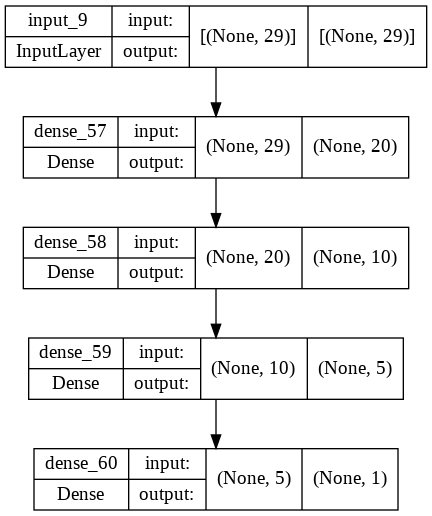

In [ ]:
plot_model(cl_model, show_shapes=True, show_layer_names=True)